In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 25px; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis 

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [3]:
#read in data and look at first five observations
titanic_train=pd.read_csv("train.csv")

titanic_test=pd.read_csv("test.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Using .info() we can see a large amount of missing values for the "Age" and "Cabin" features.
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#df.describe() gives some basic stats about the various numeric and categorical variables.
titanic_train.drop(labels=["PassengerId", "Name","Ticket","SibSp","Cabin"], axis=1).describe()

,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.381594,32.204208
std,0.486592,0.836071,14.526497,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,6.000000,512.329200


In [6]:
titanic_train.drop(labels=["PassengerId", "Name","Ticket","SibSp","Cabin"], axis=1).describe(include="O")

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


# Exploratory Data Analysis

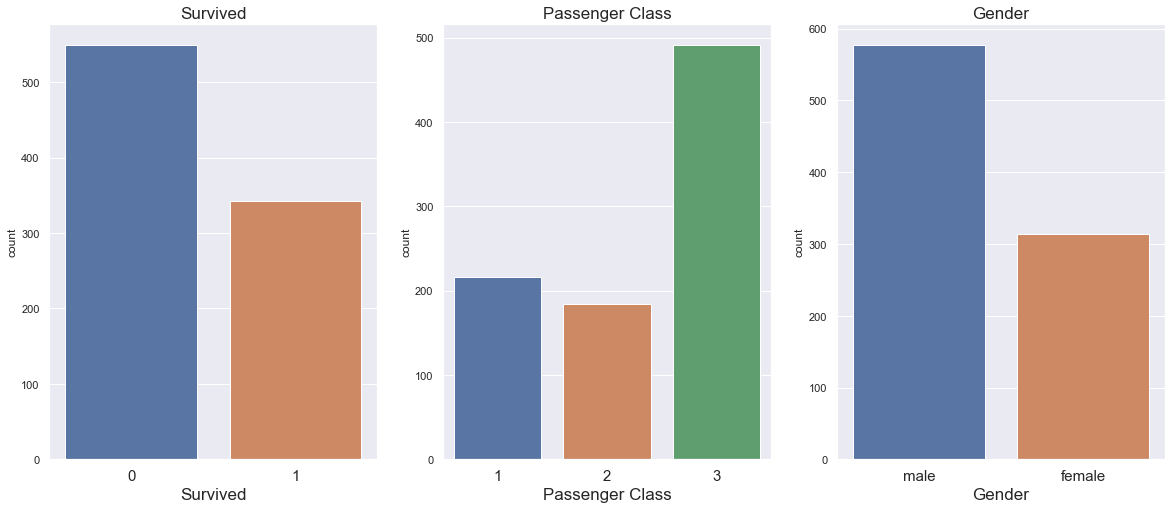

In [7]:

#The countplots show that more people died on the Titanic than survived.
#The majority of people had a 3rd class ticket and there were more males than females on board.
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.countplot(x="Survived", data=titanic_train)
plt.title("Survived", fontsize=17)
plt.xlabel("Survived",fontsize=17)
plt.xticks(fontsize=15)
plt.subplot(1,3,2)
sns.countplot(x="Pclass", data=titanic_train)
plt.title("Passenger Class", fontsize=17)
plt.xlabel("Passenger Class",fontsize=17)
plt.xticks(fontsize=15)
plt.subplot(1,3,3)
sns.countplot(x="Sex", data=titanic_train)
plt.title("Gender", fontsize=17)
plt.xlabel("Gender",fontsize=17)
plt.xticks(fontsize=15)

plt.show()

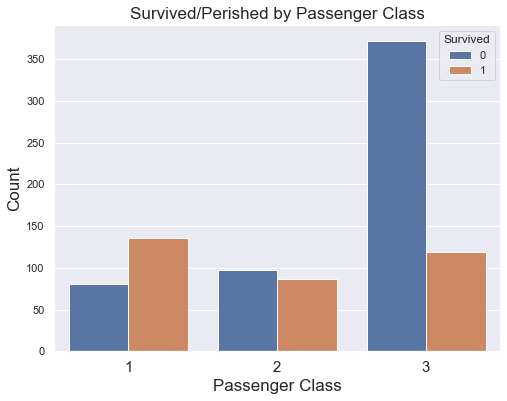

In [8]:
##In looking for potential features for the "Survived" labels, the first to consider
#is passanger class. The chart below show that an overwhelming amount of people with 
#3rd class tickets did not survive, while 1st and 2nd class passangers faired much  better.
#Thus, passanger class, may be a good predictor of survival.

#bar graph of Survived/Not Survived by Passenger Class
plt.figure(figsize=(8,6))
sns.countplot(x="Pclass", hue="Survived", data=titanic_train)
plt.title("Survived/Perished by Passenger Class", fontsize=17)
plt.xlabel("Passenger Class",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.xticks(fontsize=15)
plt.show()

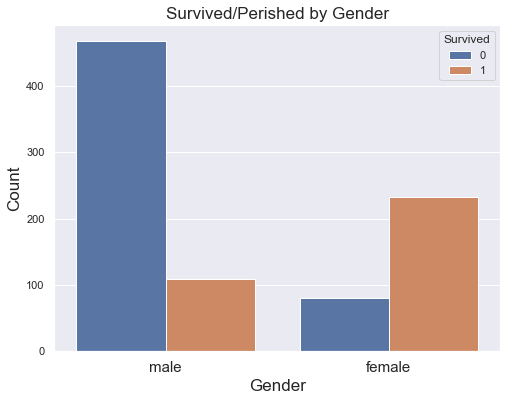

In [9]:
#Another potentially strong predictor of survival is Gender.
# The chart below shows that most males did not survive the journey while most females did.

#bar graph of Survived/Not Survived by Gender
plt.figure(figsize=(8,6))
sns.countplot(x="Sex", hue="Survived", data=titanic_train)
plt.title("Survived/Perished by Gender", fontsize=17)
plt.xlabel("Gender",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.xticks(fontsize=15)
plt.show()

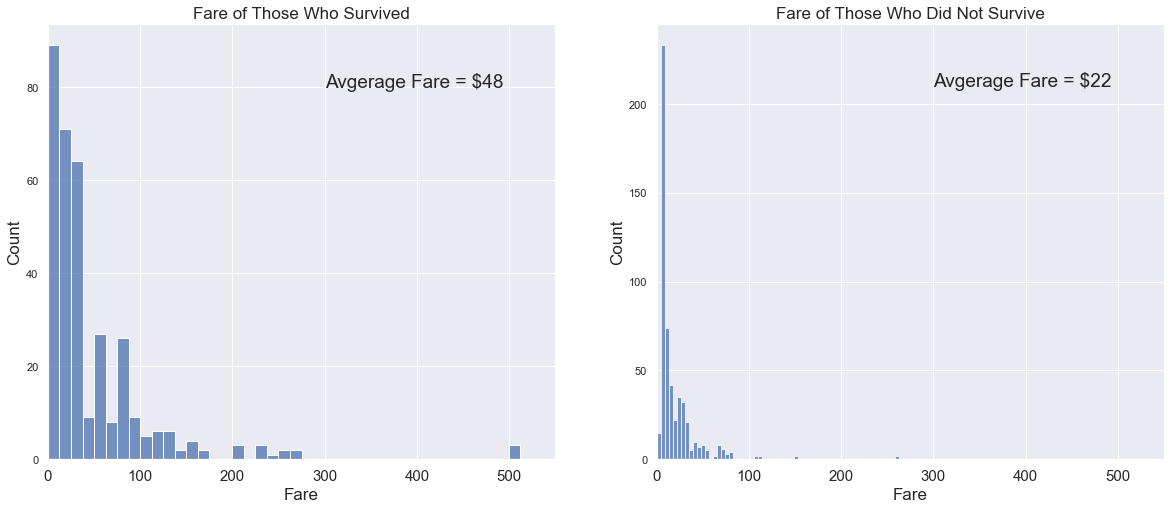

In [10]:
#The two histograms below show the fare for those who Survived vs. those who did not. 
#Fares for survivors were on average more than 2 times higher
#than those who did not survive. 
#Histograms of Fare by Survived/Not Survived
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(x="Fare", data=titanic_train[titanic_train["Survived"]==1])
plt.title("Fare of Those Who Survived", fontsize=17)
plt.xlabel("Fare",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.xticks(fontsize=15)
plt.text(300,80,"Avgerage Fare = ${}".format(round(titanic_train.loc[titanic_train["Survived"]==1,"Fare"].\
                                                   mean()),3), fontsize=19)
plt.xlim(0,550)
plt.subplot(1,2,2)
sns.histplot(x="Fare", data=titanic_train[titanic_train["Survived"]==0])
plt.title("Fare of Those Who Did Not Survive", fontsize=17)
plt.xlabel("Fare",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.xticks(fontsize=15)
plt.text(300,210,"Avgerage Fare = ${}".format(round(titanic_train.loc[titanic_train["Survived"]==0,"Fare"].\
                                                    mean()),3), fontsize=19)
plt.xlim(0,550)
plt.show()

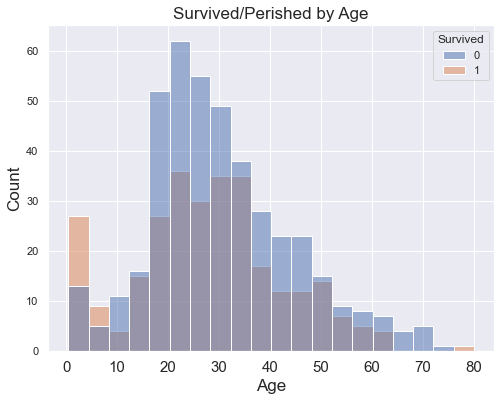

In [11]:
#bar graph of Survived/Not Survived by Age. There are some differences in the age distribution
#of those who survived and those who did not. 
plt.figure(figsize=(8,6))
sns.histplot(x="Age", hue="Survived", data=titanic_train)
plt.title("Survived/Perished by Age", fontsize=17)
plt.xlabel("Age",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.xticks(fontsize=15)
plt.show()

In [12]:
#creating age classes to see effects of age on survival


#filling age NAs with negative number to create a missing category class
titanic_train["Age_temp"] = titanic_train["Age"].fillna(-0.5)
titanic_test["Age_temp"] = titanic_test["Age"].fillna(-0.5)
#setting cut points for the classes
cut_points = [-1,0,5,12,18,30,60,100]

cat_names = ["No_data","Young_Child","Child","Teenager","Young Adult","Adult","Senior"]

titanic_train["Age_categories"] = pd.cut(titanic_train["Age_temp"],cut_points,labels=cat_names )            
titanic_test["Age_categories"] = pd.cut(titanic_test["Age_temp"],cut_points,labels=cat_names )    

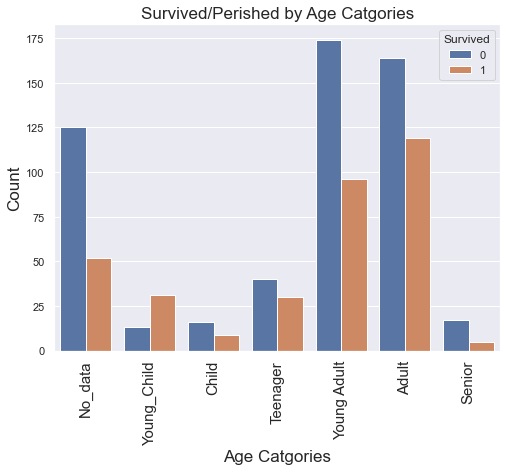

In [13]:
#bar graph of Survived/Not Survived by Age Categories
#The chart shows that young children were more likely to survive. However,
#the rest of the categories did not fair as well.
plt.figure(figsize=(8,6))
sns.countplot(x="Age_categories", hue="Survived", data=titanic_train)
plt.title("Survived/Perished by Age Catgories", fontsize=17)
plt.xlabel("Age Catgories",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.xticks(fontsize=15)
plt.xticks(rotation = 90)
plt.show()


In [14]:
#extracting titles in order to make different categories based on the
#titles. 

titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}


extracted_titles = titanic_train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
titanic_train["Title"] = extracted_titles.map(titles)
extracted_titles = titanic_test["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
titanic_test["Title"] = extracted_titles.map(titles)

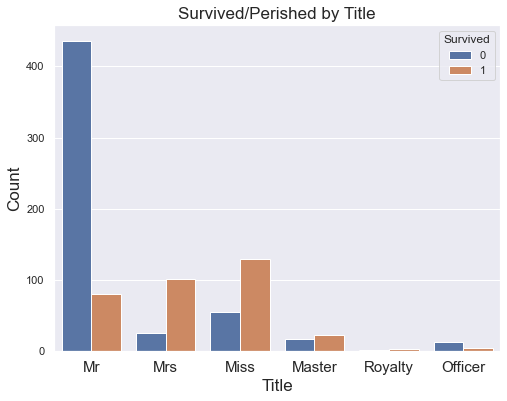

In [15]:
#bar graph of Survived/Not Survived by Title
#There is a large discrepancy in not surviving for the Mr. and Officer category, while Mrs. and Miss.
#were much likelier to survive. Title would be a good predictor.
plt.figure(figsize=(8,6))
sns.countplot(x="Title", hue="Survived", data=titanic_train)
plt.title("Survived/Perished by Title", fontsize=17)
plt.xlabel("Title",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.xticks(fontsize=15)
plt.show()



In [16]:
#creating feature for number of family members and then creating
#a categorical variable for family size


#variable for # of family members.
titanic_train["FamilyNumber"] = titanic_train["SibSp"] + titanic_train["Parch"] + 1
titanic_test["FamilyNumber"] = titanic_test["SibSp"] + titanic_train["Parch"] + 1

# Create new feature of family size
titanic_train.loc[titanic_train["FamilyNumber"]==1, 'Familysize'] ="Alone"
titanic_train.loc[titanic_train["FamilyNumber"]==2, 'Familysize'] ="SmallFam"
titanic_train.loc[(titanic_train["FamilyNumber"]>=3) & (titanic_train["FamilyNumber"]<=4), 'Familysize'] ="MedFam"
titanic_train.loc[titanic_train["FamilyNumber"]>=5, 'Familysize'] ="LargeFam"

# Create new feature of family size
titanic_test.loc[titanic_test["FamilyNumber"]==1, 'Familysize'] ="Alone"
titanic_test.loc[titanic_test["FamilyNumber"]==2, 'Familysize'] ="SmallFam"
titanic_test.loc[(titanic_test["FamilyNumber"]>=3) & (titanic_train["FamilyNumber"]<=4), 'Familysize'] ="MedFam"
titanic_test.loc[titanic_test["FamilyNumber"]>=5, 'Familysize'] ="LargeFam"

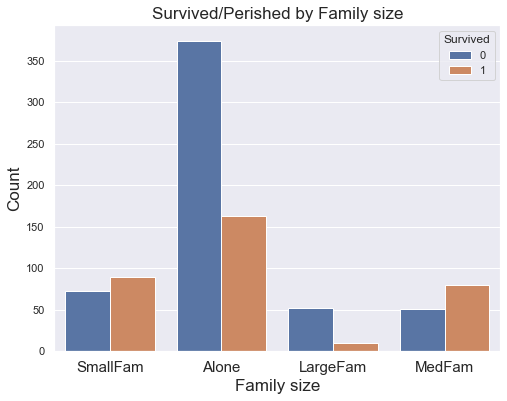

In [17]:
#bar graph of Survived/Not by Family size
#We can see there is a large discrepancy in survival for people who were alone 
#and in large families. Should be a good predictor.
plt.figure(figsize=(8,6))
sns.countplot(x="Familysize", hue="Survived", data=titanic_train)
plt.title("Survived/Perished by Family size", fontsize=17)
plt.xlabel("Family size",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.xticks(fontsize=15)
#plt.xticks(rotation = 90)
plt.show()



# **Functions for Goodness of fit, ROC Curve and Precision - Recall Curve**

In [23]:
#function to obtain precision, recall, TPR and FPR for model. Accuracy already tested below
#using GridSearchCV

def fit_metrics(model, x_vars, y_var):
    stratified=StratifiedKFold(5)
    #getting precision and recall scores
    precision=  cross_val_score(model, x_vars, y_var, cv=stratified, scoring ="precision").mean()
    recall=  cross_val_score(model, x_vars, y_var, cv=stratified, scoring ="recall").mean()
    #creating prediction using cross_val_predict for confusion matrix to get FPR score
    predictions_for_confusion_mat=cross_val_predict(model, x_vars, y_var, cv=stratified)
    #run confusion matrix to calculate FPR score
    confusion_m = confusion_matrix(y_var, predictions_for_confusion_mat)
    fpr=confusion_m[0,1]/(confusion_m[0,1] + confusion_m[0,0])
    
    metrics ={"Precision" : np.round(precision,3),
             "Recall (TPR)" : np.round(recall,3),
             "FPR" : np.round(fpr,3)}
    metrics_df=pd.DataFrame(metrics, index=["Additional Goodness Of Fit Metrics"])
    
   
    return  metrics_df

In [24]:
#function to create ROC curve

def roc_curve_chart(fpr, tpr, auc_roc_value, reg_name):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlabel("False Positive Rate",fontsize=16)
    plt.ylabel("True Positive Rate",fontsize=16)
    plt.title("{} ROC Curve".format(reg_name),fontsize=17)
    plt.text(0.5,0.2,"AUC-ROC Value = {}".format(round(auc_roc_value,3)), fontsize=15)

In [25]:
#function to create Precision-Recall curve

def precision_recall_chart(recall, precision, reg_name):
    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, linewidth=2)
    plt.xlabel("Recall",fontsize=16)
    plt.ylabel("Precision",fontsize=16)
    plt.title("{} Precision-Recall Chart".format(reg_name),fontsize=17)

# **Random Forest Classifier Cross-Validation Analysis: Parameter Tunning With GridSearchCV**

In [26]:
#Running Grid Search Cross-Validiation using a Random Forest Classifier

#defining features for preprocessing for the pipepline below
#label features name
label=["Survived"]

#label feature name
numerical_features= ['Fare']
categorical_features = ["Pclass", "Sex", "Embarked"]
target_encoded_features= ["Age_categories", "Title", "Familysize"]

model_features=numerical_features+categorical_features +target_encoded_features

In [27]:
#Data preprocessing pipeline - used in RandomForest, ExtraTrees and XGBoost models

#Numerical Preprocessing includes. Simple imputer using median values to fill in missing 
#this is helpfull for any missing values once we get to the stage of preprocessing the 
#test set after the cross-validation.Also StandardScaler scales the data.
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy="median")),
     ('s_scale', StandardScaler())
     
     ])

#Categorical Preprocessing includes imputing with most frequent and one hot encoding.
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(drop="first"))
   
])


#Target Encoding Preprocessing 
#and StandardScaler 
target_encode_pipeline=Pipeline(steps=[
                     ('t_encode', TargetEncoder(smoothing=1)),
                    ('s_scale', StandardScaler())

                                 ])

# Used ColumnTransformer to apply the numerical, categorical, and target encoded 
#preprocessing steps to the correct columns.
combined_transforms = ColumnTransformer(
    transformers=[
        ('numerical', numerical_pipeline ,numerical_features),
        ('one_hot', categorical_pipeline, categorical_features),
         ('target_encode', target_encode_pipeline,target_encoded_features)
    ])


In [28]:
#instanciate RandomForestClassifier 
random_forest=RandomForestClassifier(random_state=4)

#create a pipeline for preprocessing from above and RandomForest
model_pipeline=Pipeline(steps=[
                       ('data_preprocess', combined_transforms),
                        ('r_forest', random_forest)])

#list parameters for Grid Search

params={"r_forest__n_estimators": [50,100,150,200,300],
        "r_forest__max_features" : ['sqrt', 0.25, 0.5, 0.75, .9],
         "r_forest__max_depth" :[2, 4, 6, 8, 10],
         "r_forest__criterion": ("gini", "entropy")}

#use stratified folds to keep the balance of survived/not survived in every fold
stratified=StratifiedKFold(5)

#use GridSearchCV algorithm with 5 folds. GridSearchCV has the option to show both the train
# and the validation scores
grid_random_forest=GridSearchCV(model_pipeline,params, scoring='accuracy',\
                        return_train_score=True, cv=stratified, n_jobs=-1)
grid_random_forest.fit(titanic_train[model_features], titanic_train[label].values.ravel())

#make df of train and validation score means for each parameter tested.
grid_search_random_forest=pd.DataFrame({ "Parameters":grid_random_forest.cv_results_["params"] ,\
                                      "Accuracy_Train_Score":grid_random_forest.cv_results_["mean_train_score"],\
                                        "Accuracy_Validation_Score": grid_random_forest.cv_results_["mean_test_score"]})



In [29]:
#grid_search_random_forest.style.set_properties(subset=['parameters'], **{'width': '1000px'})
pd.set_option('max_colwidth',300)

grid_search_random_forest

,Parameters,Accuracy_Train_Score,Accuracy_Validation_Score
0,"{'r_forest__criterion': 'gini', 'r_forest__max_depth': 2, 'r_forest__max_features': 'sqrt', 'r_forest__n_estimators': 50}",0.824354,0.810357
1,"{'r_forest__criterion': 'gini', 'r_forest__max_depth': 2, 'r_forest__max_features': 'sqrt', 'r_forest__n_estimators': 100}",0.823232,0.818172
2,"{'r_forest__criterion': 'gini', 'r_forest__max_depth': 2, 'r_forest__max_features': 'sqrt', 'r_forest__n_estimators': 150}",0.822952,0.815919
3,"{'r_forest__criterion': 'gini', 'r_forest__max_depth': 2, 'r_forest__max_features': 'sqrt', 'r_forest__n_estimators': 200}",0.819865,0.808060
4,"{'r_forest__criterion': 'gini', 'r_forest__max_depth': 2, 'r_forest__max_features': 'sqrt', 'r_forest__n_estimators': 300}",0.818744,0.806936
...,...,...,...
245,"{'r_forest__criterion': 'entropy', 'r_forest__max_depth': 10, 'r_forest__max_features': 0.9, 'r_forest__n_estimators': 50}",0.936309,0.835039
246,"{'r_forest__criterion': 'entropy', 'r_forest__max_depth': 10, 'r_forest__max_features': 0.9, 'r_forest__n_estimators': 100}",0.937991,0.840638
247,"{'r_forest__criterion': 'entropy', 'r_forest__max_depth': 10, 'r_forest__max_features': 0.9, 'r_forest__n_estimators': 150}",0.938273,0.836162
248,"{'r_forest__criterion': 'entropy', 'r_forest__max_depth': 10, 'r_forest__max_features': 0.9, 'r_forest__n_estimators': 200}",0.937712,0.833915


In [30]:
print(grid_random_forest.best_params_)
print(grid_random_forest.best_score_)

{'r_forest__criterion': 'gini', 'r_forest__max_depth': 8, 'r_forest__max_features': 0.75, 'r_forest__n_estimators': 50}
0.845125855250769


In [31]:
#Applying preprocessing pipeline  above to the train
#dataset using the chosen features above. Used fit_transfrom.
X_train=combined_transforms.fit_transform(titanic_train[model_features],titanic_train[label])

In [32]:
#Applying preprocessing pipeline to the test data. Used only transform as the data was fit on the
#training set and now transformed the test set to avoid data leakage
X_test=combined_transforms.transform(titanic_test[model_features])

In [33]:
#Running best Random Forest model for various analysis tasks

#Using the preprocessed features to fit random forest over all the observations
#of the training set 
#hyperparameters diffirent from best model to control overfitting (described in the write up)
random_forest_final=RandomForestClassifier(criterion= 'gini',max_depth=6, max_features = 0.75,\
                                           n_estimators= 50, random_state=4)
random_forest_final.fit(X_train, titanic_train[label].values.ravel())



#creating threshold scores for ROC and Precision-Recall charts
pridictions_threshold_random_forest=cross_val_predict(random_forest_final, X_train, \
                                                      titanic_train[label].values.ravel(), cv=5,\
                                                      method='predict_proba')

#creating predictions on the preprocessed test set for Kaggle
predictions_random_forest_kaggle=random_forest_final.predict(X_test)


In [34]:
# getting additional goodness of fit metrics
print("\n")
print("Random Forest - Additional Goodness of Fit Metrics")
fit_metrics(random_forest_final, X_train,titanic_train[label].values.ravel())



Random Forest - Additional Goodness of Fit Metrics


,Precision,Recall (TPR),FPR
Additional Goodness Of Fit Metrics,0.852,0.713,0.078


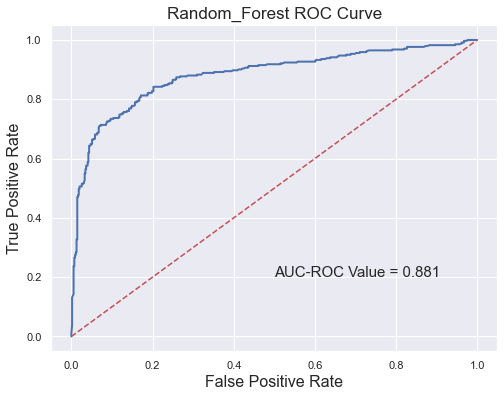

In [35]:
# creating the ROC Curve
fpr_random_forest, tpr_random_forest, thresholds = roc_curve(titanic_train[label],\
                                                             pridictions_threshold_random_forest[:,1])

roc_curve_chart(fpr_random_forest, tpr_random_forest, roc_auc_score(titanic_train[label],\
                                                    pridictions_threshold_random_forest[:,1]), "Random_Forest")

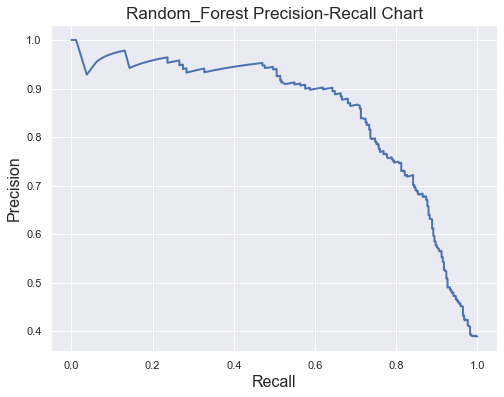

In [36]:
#Precision Recall Chart
precision_random_forest, recall_random_forest, thresholds = precision_recall_curve(titanic_train[label],\
                                        pridictions_threshold_random_forest[:,1])

precision_recall_chart(recall_random_forest, precision_random_forest, "Random_Forest")

In [37]:
#Creating Kaggle Random Forest submission file.
test_ids =titanic_test["PassengerId"]

submission_random_forest_df = {"PassengerId": test_ids,
                 "Survived": predictions_random_forest_kaggle.reshape(-1)}
submission_random_forest = pd.DataFrame(submission_random_forest_df)

submission_random_forest.to_csv("submission_random_forest.csv",index=False)

# **Extra Trees Cross-Validation Analysis: Parameter Tunning With GridSearchCV**

In [38]:
#instanciate Extra Trees model
extra_tree_reg=ExtraTreesClassifier(random_state=4)

#create a pipeline with preprocessing code from above and the Extra Trees model
model_pipeline=Pipeline(steps=[
                       ('data_preprocess', combined_transforms),
                        ('extra_trees', extra_tree_reg)])

#list parameters for Grid Search

params={"extra_trees__n_estimators": [50,100,150,200],
        "extra_trees__max_features" : ['sqrt', 0.25, 0.5, 0.75, .9],
         "extra_trees__max_depth" :[2, 4, 6, 8, 10],
         "extra_trees__criterion": ("gini", "entropy")}

#use stratified folds to keep the balance of survived/not survived in every fold
stratified=StratifiedKFold(5)

#use GridSearchCV algorithm with 5 folds. GridSearchCV has the option to show both the train
# and the validation scores
grid_extra_trees=GridSearchCV(model_pipeline,params, scoring='accuracy',\
                        return_train_score=True, cv=stratified, n_jobs=-1,)
grid_extra_trees.fit(titanic_train[model_features], titanic_train[label].values.ravel())
#make df of train and validation score means for each parameter tested.
grid_search_extra_trees=pd.DataFrame({ "Parameters":grid_extra_trees.cv_results_["params"] ,\
                                      "Accuracy_Train_Score":grid_extra_trees.cv_results_["mean_train_score"],\
                                        "Accuracy_Validation_Score": grid_extra_trees.cv_results_["mean_test_score"]})
grid_search_extra_trees


,Parameters,Accuracy_Train_Score,Accuracy_Validation_Score
0,"{'extra_trees__criterion': 'gini', 'extra_trees__max_depth': 2, 'extra_trees__max_features': 'sqrt', 'extra_trees__n_estimators': 50}",0.821830,0.808079
1,"{'extra_trees__criterion': 'gini', 'extra_trees__max_depth': 2, 'extra_trees__max_features': 'sqrt', 'extra_trees__n_estimators': 100}",0.824076,0.810313
2,"{'extra_trees__criterion': 'gini', 'extra_trees__max_depth': 2, 'extra_trees__max_features': 'sqrt', 'extra_trees__n_estimators': 150}",0.810328,0.800195
3,"{'extra_trees__criterion': 'gini', 'extra_trees__max_depth': 2, 'extra_trees__max_features': 'sqrt', 'extra_trees__n_estimators': 200}",0.804435,0.800188
4,"{'extra_trees__criterion': 'gini', 'extra_trees__max_depth': 2, 'extra_trees__max_features': 0.25, 'extra_trees__n_estimators': 50}",0.800227,0.796818
...,...,...,...
195,"{'extra_trees__criterion': 'entropy', 'extra_trees__max_depth': 10, 'extra_trees__max_features': 0.75, 'extra_trees__n_estimators': 200}",0.920037,0.821562
196,"{'extra_trees__criterion': 'entropy', 'extra_trees__max_depth': 10, 'extra_trees__max_features': 0.9, 'extra_trees__n_estimators': 50}",0.920035,0.819321
197,"{'extra_trees__criterion': 'entropy', 'extra_trees__max_depth': 10, 'extra_trees__max_features': 0.9, 'extra_trees__n_estimators': 100}",0.921719,0.821562
198,"{'extra_trees__criterion': 'entropy', 'extra_trees__max_depth': 10, 'extra_trees__max_features': 0.9, 'extra_trees__n_estimators': 150}",0.921158,0.821562


In [39]:
print(grid_extra_trees.best_params_)
print(grid_extra_trees.best_score_)

{'extra_trees__criterion': 'gini', 'extra_trees__max_depth': 6, 'extra_trees__max_features': 'sqrt', 'extra_trees__n_estimators': 200}
0.8417425145941874


In [40]:
#Running best Extra Trees model for various analysis tasks

#Using the preprocessed features to fit Extra Trees over all the observations
#of the training set 
extra_trees_final=ExtraTreesClassifier(criterion= 'gini',max_depth=6, max_features = 'sqrt',\
                                       n_estimators= 200, random_state=4)
extra_trees_final.fit(X_train, titanic_train[label].values.ravel())



#creating threshold scores for ROC and Precision-Recall charts
pridictions_threshold_extra_trees=cross_val_predict(extra_trees_final, X_train,\
                                                    titanic_train[label].values.ravel(), cv=5,\
                                                    method='predict_proba')

#creating predictions on the preprocessed test set
predictions_extra_trees_kaggle=extra_trees_final.predict(X_test)



In [41]:
# getting the goodness of fit metrics
print("\n")
print("Extra Trees - Additional Goodness of Fit Metrics")
fit_metrics(extra_trees_final, X_train,titanic_train[label].values.ravel())



Extra Trees - Additional Goodness of Fit Metrics


,Precision,Recall (TPR),FPR
Additional Goodness Of Fit Metrics,0.854,0.696,0.075


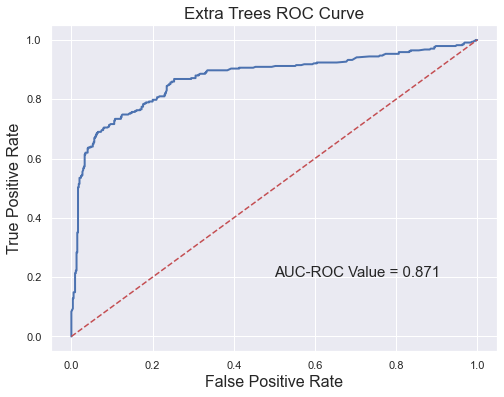

In [42]:
# creating the ROC Curve
fpr_extra_trees, tpr_extra_trees, thresholds = roc_curve(titanic_train[label],pridictions_threshold_extra_trees[:,1])

roc_curve_chart(fpr_extra_trees, tpr_extra_trees, roc_auc_score(titanic_train[label],\
                                                    pridictions_threshold_extra_trees[:,1]), "Extra Trees")

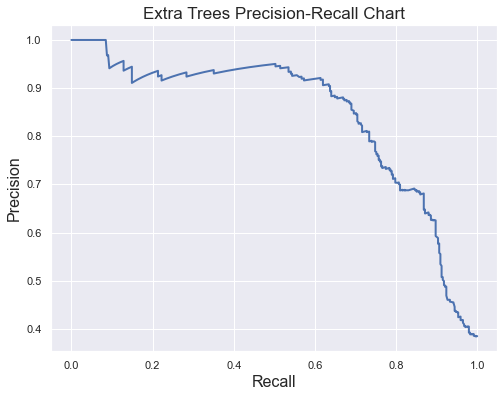

In [43]:
precision_extra_trees, recall_extra_trees, thresholds = precision_recall_curve(titanic_train[label],\
                                        pridictions_threshold_extra_trees[:,1])

precision_recall_chart(recall_extra_trees, precision_extra_trees, "Extra Trees")

In [44]:
#Creating Kaggle Extra trees submission file.
test_ids =titanic_test["PassengerId"]

submission_extra_trees_df = {"PassengerId": test_ids,
                 "Survived": predictions_extra_trees_kaggle.reshape(-1)}
submission_extras_tree = pd.DataFrame(submission_extra_trees_df)

submission_extras_tree.to_csv("submission_extra_trees.csv",index=False)

# **XGBoost Classification (Gradient Boosting Trees) Cross-Validation Analysis: Parameter Tunning With GridSearchCV**

In [45]:
import time
start=time.time()
#instanciate XGBoost Classification
xgboost=XGBClassifier(random_state=4, verbosity=0)

#create a pipeline with preprocessing code from above and the XGBoost model
model_pipeline=Pipeline(steps=[
                       ('data_preprocess', combined_transforms),
                        ('xgboost', xgboost)])

#list parameters for Grid Search

params={
    'xgboost__n_estimators': [50, 100, 150, 250],
    'xgboost__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgboost__min_child_weight': [2, 4, 6, 8, 10],
    'xgboost__max_depth': [2,4,6,8],
    'xgboost__colsample_bytree': [0.5, 0.75, 0.9], #like max_features in Random Forests
    

  }
print(time)
#use stratified folds to keep the balance of survived/not survived in every fold
stratified=StratifiedKFold(5)

#use GridSearchCV algorithm with 10 folds. GridSearchCV has the option to show both the train
# and the validation scores
grid_xgboost=GridSearchCV(model_pipeline,params, scoring='accuracy',\
                        return_train_score=True, cv=stratified, n_jobs=-1)
grid_xgboost.fit(titanic_train[model_features], titanic_train[label].values.ravel())
#make df of train and validation score means for each parameter tested.
grid_search_xgboost=pd.DataFrame({ "Parameters":grid_xgboost.cv_results_["params"] ,\
                                      "Accuracy_Train_Score":grid_xgboost.cv_results_["mean_train_score"],\
                                        "Accuracy_Validation_Score": grid_xgboost.cv_results_["mean_test_score"]})
#
end = time.time()
print(end - start)
grid_search_xgboost


<module 'time' (built-in)>
275.33742332458496


,Parameters,Accuracy_Train_Score,Accuracy_Validation_Score
0,"{'xgboost__colsample_bytree': 0.5, 'xgboost__learning_rate': 0.01, 'xgboost__max_depth': 2, 'xgboost__min_child_weight': 2, 'xgboost__n_estimators': 50}",0.828561,0.811487
1,"{'xgboost__colsample_bytree': 0.5, 'xgboost__learning_rate': 0.01, 'xgboost__max_depth': 2, 'xgboost__min_child_weight': 2, 'xgboost__n_estimators': 100}",0.826317,0.810370
2,"{'xgboost__colsample_bytree': 0.5, 'xgboost__learning_rate': 0.01, 'xgboost__max_depth': 2, 'xgboost__min_child_weight': 2, 'xgboost__n_estimators': 150}",0.828003,0.821549
3,"{'xgboost__colsample_bytree': 0.5, 'xgboost__learning_rate': 0.01, 'xgboost__max_depth': 2, 'xgboost__min_child_weight': 2, 'xgboost__n_estimators': 250}",0.829126,0.822673
4,"{'xgboost__colsample_bytree': 0.5, 'xgboost__learning_rate': 0.01, 'xgboost__max_depth': 2, 'xgboost__min_child_weight': 4, 'xgboost__n_estimators': 50}",0.828280,0.809240
...,...,...,...
955,"{'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.3, 'xgboost__max_depth': 8, 'xgboost__min_child_weight': 8, 'xgboost__n_estimators': 250}",0.904040,0.846243
956,"{'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.3, 'xgboost__max_depth': 8, 'xgboost__min_child_weight': 10, 'xgboost__n_estimators': 50}",0.871771,0.838403
957,"{'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.3, 'xgboost__max_depth': 8, 'xgboost__min_child_weight': 10, 'xgboost__n_estimators': 100}",0.882434,0.837267
958,"{'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.3, 'xgboost__max_depth': 8, 'xgboost__min_child_weight': 10, 'xgboost__n_estimators': 150}",0.887484,0.840619


In [46]:
print(grid_xgboost.best_params_)

print(grid_xgboost.best_score_)

{'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.2, 'xgboost__max_depth': 6, 'xgboost__min_child_weight': 6, 'xgboost__n_estimators': 150}
0.851861151214613


In [47]:
grid_search_xgboost.to_csv("xbgoost_messaround.csv")

In [48]:
#Running best xgboost model for various analysis tasks

#Using the preprocessed features to the XGBoost model over all the observations
#of the training set 
#hyperparameters diffirent from best model to control overfitting (described in the write-up)
xgboost_final=XGBClassifier(n_estimators= 50, learning_rate=0.3, min_child_weight= 10, max_depth= 6,\
                                colsample_bytree=0.5, random_state=4, verbosity=0)
xgboost_final.fit(X_train, titanic_train[label].values.ravel())


#creating threshold scores for ROC and Precision-Recall charts
pridictions_threshold_xgboost=cross_val_predict(xgboost_final, X_train, titanic_train[label].values.ravel(), cv=5,\
                                            method='predict_proba')

#creating predictions on the preprocessed test set
predictions_xgboost_kaggle=xgboost_final.predict(X_test)




In [49]:
# getting the goodness of fit metrics
print("\n")
print("XGBoost - Additional Goodness of Fit Metrics")
fit_metrics(xgboost_final, X_train,titanic_train[label].values.ravel())



XGBoost - Additional Goodness of Fit Metrics


,Precision,Recall (TPR),FPR
Additional Goodness Of Fit Metrics,0.828,0.713,0.095


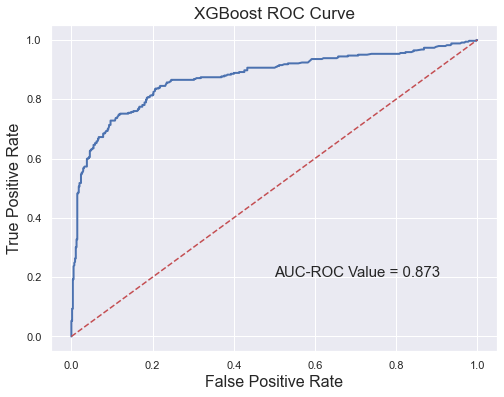

In [50]:
# creating the ROC Curve
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(titanic_train[label],pridictions_threshold_xgboost[:,1])

roc_curve_chart(fpr_xgboost, tpr_xgboost, roc_auc_score(titanic_train[label],\
                                                    pridictions_threshold_xgboost[:,1]), "XGBoost")

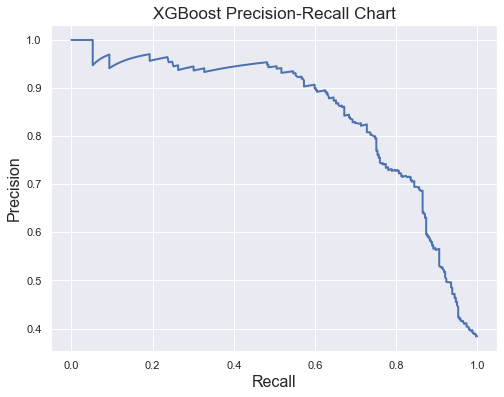

In [51]:
precision_xgboost, recall_xgboost, thresholds = precision_recall_curve(titanic_train[label],\
                                        pridictions_threshold_xgboost[:,1])

precision_recall_chart(recall_xgboost, precision_xgboost, "XGBoost")

In [52]:
#Creating Kaggle XGBoost submission file.
test_ids =titanic_test["PassengerId"]

submission_xgboost_df = {"PassengerId": test_ids,
                 "Survived": predictions_xgboost_kaggle.reshape(-1)}
submission_xgboost = pd.DataFrame(submission_xgboost_df)

submission_xgboost.to_csv("submission_xgboost.csv",index=False)

# **Stacking of All 3 Models - Cross-Validation Analysis**

In [53]:
#Creating an ensemble model from the final Random_forest, Extra_trees, XGBoost  models above.

estimators = [
         ('Random_forest', RandomForestClassifier(criterion= 'gini',max_depth=6, \
                                                  max_features = 0.75, n_estimators= 50, random_state=4)),    
         ('Extra_trees', ExtraTreesClassifier(criterion= 'gini',max_depth=6, \
                                             max_features = 'sqrt', n_estimators= 200, random_state=4)),
         ("XGBoost", XGBClassifier(n_estimators= 50, learning_rate=0.3, min_child_weight= 10, max_depth= 6,\
                                colsample_bytree=0.5, random_state=4, verbosity=0)),
      
]

stack_3_models = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
#using cross validation to test the model accuracy.

scores=cross_validate(stack_3_models,X_train, titanic_train[label].values.ravel(), \
                      scoring='accuracy', return_train_score=True, cv=5)

#make df of train and validation score means
stack_3_models_scores=pd.DataFrame({"Train_Score":scores["train_score"],\
                    "Validation_Score":scores["test_score"]})

stack_3_models_scores.mean()

Train_Score         0.868687
Validation_Score    0.830538
dtype: float64

In [54]:
#creating threshold scores for ROC and Precision-Recall charts
pridictions_threshold_stack_3_models=cross_val_predict(stack_3_models, X_train,\
                                            titanic_train[label].values.ravel(), cv=5,\
                                             method='decision_function')

#Fitting and predicting for Kaggle
stack_3_models.fit(X_train, titanic_train[label].values.ravel())
                               
predictions_stack_3_models_kaggle=stack_3_models.predict(X_test)    

In [55]:
# getting the goodness of fit metrics
print("\n")
print("Stack_3_models - Additional Goodness of Fit Metrics")
fit_metrics(stack_3_models, X_train,titanic_train[label].values.ravel())



Stack_3_models - Additional Goodness of Fit Metrics


,Precision,Recall (TPR),FPR
Additional Goodness Of Fit Metrics,0.834,0.702,0.089


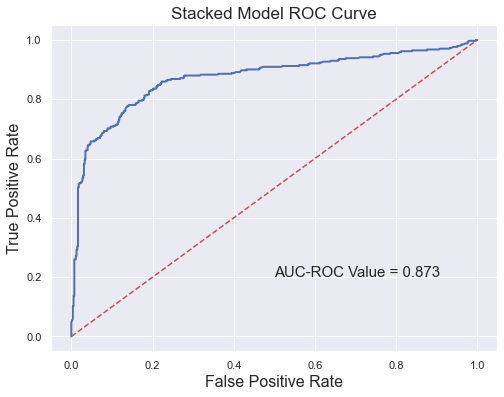

In [56]:
# creating the ROC Curve
fpr_stack_3_models, tpr_stack_3_models, thresholds_stack_3_models = roc_curve(titanic_train[label]\
                                                        ,pridictions_threshold_stack_3_models)

roc_curve_chart(fpr_stack_3_models, tpr_stack_3_models, roc_auc_score(titanic_train[label],\
                                        pridictions_threshold_stack_3_models), "Stacked Model")

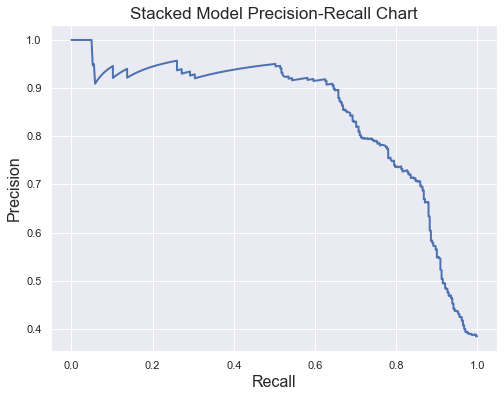

In [57]:
precision_stack_3_models, recall_stack_3_models, thresholds = precision_recall_curve(titanic_train[label],\
                                        pridictions_threshold_stack_3_models)

precision_recall_chart(recall_stack_3_models, precision_stack_3_models, "Stacked Model")

In [58]:
#Creating Kaggle Stacked submission file.
test_ids =titanic_test["PassengerId"]

submission_stack_3_models_df = {"PassengerId": test_ids,
                 "Survived": predictions_stack_3_models_kaggle.reshape(-1)}
submission_stack_3_models = pd.DataFrame(submission_stack_3_models_df)

submission_stack_3_models.to_csv("submission_stack_3_models.csv",index=False)